<a href="https://colab.research.google.com/github/ashisaxena710/Play-Store-App-Review-Analysis-/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
app_path='/content/drive/MyDrive/Colab Notebooks/Alma Better/Capstone Project/Capstone Project 1/Play Store Data.csv'
app_df=pd.read_csv(app_path)

In [4]:
review_path='/content/drive/MyDrive/Colab Notebooks/Alma Better/Capstone Project/Capstone Project 1/User Reviews.csv'
review_df=pd.read_csv(review_path)

### First we will analyse and clean the first data set (Play Store Data) and after that we'll analyse and clean the second data set(User Review).


#Analysing and cleaning Play Store Data

In [5]:
# Let us first check the first 10 rows of the dataframe
app_df.head(10)  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [6]:
# Checking the last 10 rows of the dataframe
app_df.tail(10)      

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
# Checking the shape of the dataframe
app_df.shape         

(10841, 13)

In [8]:
# Droppping Duplicate Columns
app_df.drop_duplicates(inplace=True)
# Resetting the index
app_df.reset_index(drop=True,inplace=True)
app_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
# Columns of the dataframe
app_df.columns      

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
# getting the idea of how many null values are there in each columns
app_df.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [11]:
# Unique categories and number of counts of each category
app_df['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

We can see that there is a category ,1.9, which is totally different from others. Lets check the neighbouring rows of this category.

In [12]:
# Getting the index of ['Category']=='1.9'
app_df[app_df['Category']=='1.9'].index.values

array([9990])

In [13]:
# slicing the DataFrame to get below and above rows of this category.
neighbour_rows_of_9990=app_df.iloc[9985:9995,:]
neighbour_rows_of_9990

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9985,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
9986,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
9987,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
9988,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
9989,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
9991,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
9992,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
9993,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
9994,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up


By comparing the row 9990 with other rows, we can clearly observe that, except the first column, the value of ith column in 9990th row is the value of (i+1)th column.

In [14]:
# We will shift that particular row to right so that its values get assigned to their respective columns. We will use .shift() method for this.
app_df.loc[9990,:]=app_df.loc[9990,:].shift()      

# Shifting will shift the values to the right and in this the value of 'App' column will be shifted to the right and 
# there will be a null value in that place. So we will make sure that the value of 'App' column remains the same.
# For this we will assign the 'category' column's value, executed by the above shift() method, to the 'App' column.   
app_df.loc[9990,'App']=app_df.loc[9990,'Category']                    

# Now since all the values of the row 9990 are at their correct position but both the columns, that is, 
# the app column and the category column both will have the same value, so we make the value of category column a null value.
app_df.loc[9990,'Category']=np.NaN          

neighbour_rows_of_9990

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9985,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
9986,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
9987,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
9988,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
9989,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
9990,Life Made WI-Fi Touchscreen Photo Frame,NaN,19.0,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up
9991,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
9992,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
9993,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
9994,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up


By looking at the dataframe, one can easily see that the values in columns 'Category' and 'Genres' are approximately the same.By analysing this app 'Life Made WI-Fi Touchscreen Photo Frame' , we would say this app comes in category 'ENTERTAINMENT' and similarly the genre would be 'Entertainment'.



In [15]:
app_df.loc[9990,'Category']='ENTERTAINMENT'
app_df.loc[9990,'Genres']='Entertainment'

Also the value '1.9' which was present in column 'Category' is changed to '19.0' when shifted to right column, i.e, 'Rating'. So will correct that value '19.0' to '1.9'.

In [16]:
# Rating
# Correcting the value '19.0' to '1.9'
app_df['Rating']=app_df['Rating'].replace('19.0','1.9')

# Converting into string
app_df['Rating']=app_df['Rating'].astype('str') 
                       
# Converting into float
app_df['Rating']=app_df['Rating'].astype('float')                      

# Removing null values from 'Rating' column and substituting mode value of that column in those null places.
app_df['Rating']=app_df['Rating'].fillna(app_df['Rating'].median())    

In [17]:
# Reviews
# Converting the datatype to integer, since the review column contains the number of reviews of each app which should be in integer datatype.
app_df['Reviews']=app_df['Reviews'].astype('int')

In [18]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


In [19]:
# size
#The sizes of the apps are in megabytes(M) and kilobytes(k). We will keep all the values of the column 'Size' in kilobyte. 
# 1 megabyte = 1000 kilobyte             

# converting the size into kilobyte , removing 'M'
app_df['Size']=app_df['Size'].str.replace('M','000') 

# Removing 'k'
app_df['Size']=app_df['Size'].str.replace('k','')    

# Replacing 'Varies with device' with 0
app_df['Size']=app_df['Size'].str.replace('Varies with device','0') 

# Converting the datatype of the column 'Size' into float
app_df['Size']=app_df['Size'].astype('str')       
app_df['Size']=app_df['Size'].astype('float')

# Now we will replace 'Varies with device'(which was replaced with '0') with the median value.
num_size=pd.DataFrame(app_df['Size'][app_df['Size']!=0.0])
app_df['Size']=app_df['Size'].replace(0.0,num_size['Size'].median())   

In [20]:
# Install
# viewing the unique value of the column 'Installs'
app_df['Installs'].unique()  

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

We will remove + and , from the column 'Install' and will convert the datatype to float.

In [21]:
app_df['Installs']=app_df.Installs.apply(lambda x:x.strip("+"))    # Striping '+'
app_df['Installs']=app_df.Installs.apply(lambda x:x.replace(",",""))   # Replacing , with '' so that no characters in between each value.

In [22]:
app_df['Installs'].unique().astype('str')  # Conversion into string
app_df['Installs']=app_df['Installs'].astype('int')  # Conversion into integer

In [23]:
# Type
app_df[app_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8667,Command & Conquer: Rivals,FAMILY,4.3,0,13000.0,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


We can drop this row as it contain inappropriate values in different columns. 

In [24]:
app_df.drop(index=8667,axis=0,inplace=True)   # Dropping the 8667th row

In [25]:
# Price
# Though some apps are free, but those apps which are of type 'paid' have price in dollors($).
# We will removing that '$' sign and convert the column into float datatype.
app_df['Price'].value_counts()
app_df['Price']=app_df.Price.apply(lambda x:x.strip("$"))
app_df['Price']=app_df['Price'].astype('str')
app_df['Price']=app_df['Price'].astype('float')

In [26]:
# Last Updated
# converting the datatype 'Last Updated' column to date
import datetime as dt
app_df['Last Updated']=app_df['Last Updated'].apply(lambda x:dt.datetime.strptime(x,'%B %d, %Y')) 

We don't require the last two columns of the dataset. we will drop them.

In [27]:
# Dropping the last two columns : Current Ver and Android Ver
app_df=app_df.drop(app_df.columns[-2:],axis=1)   

In [28]:
# Now lets check info()
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10357
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  int64         
 4   Size            10357 non-null  float64       
 5   Installs        10357 non-null  int64         
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 971.0+ KB


In [29]:
# Total number of unique of apps
app_df['App'].nunique() 

9659

In [30]:
# Let's see the number of each apps
app_df['App'].value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
Pacify (Android P theme) - Theme for Xperia™     1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9659, dtype: int64

In [31]:
# Observing the dataframe which include on 'ROBLOX' app
app_df[app_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
1446,ROBLOX,GAME,4.5,4447388,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31
1494,ROBLOX,GAME,4.5,4447346,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31
1538,ROBLOX,GAME,4.5,4448791,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31
1625,ROBLOX,GAME,4.5,4449882,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31
1653,ROBLOX,GAME,4.5,4449910,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31
1786,ROBLOX,FAMILY,4.5,4449910,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31
1857,ROBLOX,FAMILY,4.5,4450855,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31
1956,ROBLOX,FAMILY,4.5,4450890,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31
4072,ROBLOX,FAMILY,4.5,4443407,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31


In [32]:
# Observing the dataframe which include on '8 Ball Pool' app
app_df[app_df['App']=='8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
1468,8 Ball Pool,GAME,4.5,14198297,52000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31
1496,8 Ball Pool,GAME,4.5,14198602,52000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31
1544,8 Ball Pool,GAME,4.5,14200344,52000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31
1628,8 Ball Pool,GAME,4.5,14200550,52000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31
1654,8 Ball Pool,GAME,4.5,14201891,52000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31
1744,8 Ball Pool,GAME,4.5,14201604,52000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31
3508,8 Ball Pool,SPORTS,4.5,14184910,52000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31


We observe that many of the rows have the same name. The row with the same app name differ only in the Reviews and Category column. The value of reviews in these rows are almost identical. So replacing the rows with same app names by a single row with the same app name with review being replaced by mean of the reviews will not do any harm.

In [33]:
# creating a dataframe with unique apps name and reviews of unique apps will be the mean of the same apps.
app_df=app_df.groupby(['App', 'Category', 'Rating', 'Size', 'Installs', 'Type',
                       'Price', 'Content Rating', 'Genres', 'Last Updated']).mean().reset_index()
app_df

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Reviews
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.3,3.6,500,Free,0.00,Everyone,Sports,2017-10-07,27.0
1,+Download 4 Instagram Twitter,SOCIAL,4.5,22000.0,1000000,Free,0.00,Everyone,Social,2018-08-02,40467.0
2,- Free Comics - Comic Apps,COMICS,3.5,9.1,10000,Free,0.00,Mature 17+,Comics,2018-07-13,115.0
3,.R,TOOLS,4.5,203.0,10000,Free,0.00,Everyone,Tools,2014-09-16,259.0
4,/u/app,COMMUNICATION,4.7,53000.0,10000,Free,0.00,Mature 17+,Communication,2018-07-03,573.0
...,...,...,...,...,...,...,...,...,...,...,...
9776,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,4.3,59000.0,100000,Free,0.00,Mature 17+,Video Players & Editors,2018-07-18,414.0
9777,💎 I'm rich,LIFESTYLE,3.8,26000.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,718.0
9778,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,18000.0,1000000,Free,0.00,Everyone,Social,2018-07-24,22098.0
9779,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,3.2,10000,Free,0.00,Everyone,Tools,2017-10-21,19.0


In [34]:
# Converting the datatype of 'Reviews' to integer datatype
app_df['Reviews']=app_df['Reviews'].astype('int')

In [35]:
# Now let's see the 'ROBLOX' apps
app_df[app_df['App']=='ROBLOX']

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Reviews
7394,ROBLOX,FAMILY,4.5,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,4448765
7395,ROBLOX,GAME,4.5,67000.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,4448663


In [36]:
app_df.describe()

,Rating,Size,Installs,Price,Reviews
count,9781.000000,9781.000000,9.781000e+03,9781.000000,9.781000e+03
mean,4.194019,17801.495389,8.565275e+06,1.086608,2.443666e+05
std,0.494900,21906.344332,5.744367e+07,16.747248,1.943041e+06
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4.100000,6.200000,1.000000e+03,0.000000,2.600000e+01
50%,4.300000,13000.000000,1.000000e+05,0.000000,1.042000e+03
75%,4.500000,25000.000000,1.000000e+06,0.000000,3.161400e+04
max,5.000000,100000.000000,1.000000e+09,400.000000,7.814326e+07


### Now let's move on to the second data set.

# Analyzing and Cleaning User Review data

In [37]:
# Let us check the first few rows of the dataframe
review_df.head()  

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [38]:
# Let us check the last few rows of the dataframe
review_df.tail()      

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [39]:
# Let us check the shape of the dataframe
review_df.shape        

(64295, 5)

In [40]:
# viewing the columns
review_df.columns        

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [41]:
# getting the idea of number of null values in each columns
review_df.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


We can observe that there are rows whose values are null for 4 columns : Translated Review, Sentiment, Sentiment Polarity, Sentiment Subjectivity.

We will not work on those rows where all the 4 columns have null value.



In [42]:
# We will create a dataframe excluding those rows (Translated Review, Sentiment, Sentiment Polarity, Sentiment Subjectivity)
review_df=review_df[~((review_df['Translated_Review'].isna()) & (review_df['Sentiment'].isna()) & (review_df['Sentiment_Polarity'].isna()) & (review_df['Translated_Review'].isna()))]

In [43]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37432 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37432 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [44]:
# Only Translated_Review contains null values. We will replace those values with None.
review_df['Translated_Review']=review_df['Translated_Review'].fillna('None')

###Now we have cleaned both the data. And here comes the next part exploration and visualization. Here we will visually illustrate the relationships in the data. We will find correlation between various columns of the data and will also plot graphs and pie charts.

# Exploring and visualizing

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

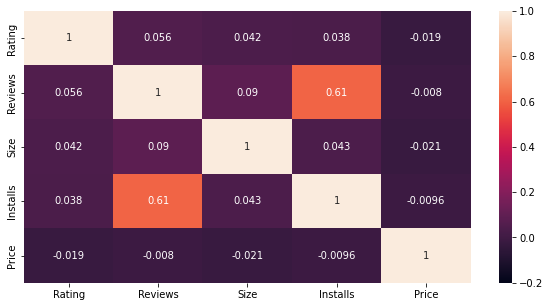

In [46]:
# Let's see correlation of following columns: Rating, Reviews and Installs.
Rating_Install_df=app_df[['Category','Rating','Reviews','Size','Installs','Price']]
plt.figure(figsize=(10,5))
sns.heatmap(Rating_Install_df.corr(),vmin=-0.2,annot=True)

From this correlation matrix, we see that reviews and installs are positively correlated. And other columns have basically no correlation. Also, if an app has higher number of installations then obviously it will have more reviews. One more thing to notice is that correlation of price with every column is less than 0.

# Objective-1 : Obtain the top 15 costly apps and their category.

In [47]:
top_15_costly_apps=app_df[['Category','App','Price']].sort_values(by='Price',axis=0,ascending=False).head(15)
top_15_costly_apps

,Category,App,Price
5388,LIFESTYLE,I'm Rich - Trump Edition,400.00
5362,FINANCE,I Am Rich Premium,399.99
5380,FINANCE,I am Rich!,399.99
5382,LIFESTYLE,I am rich,399.99
5383,FINANCE,I am rich (Most expensive app),399.99
5363,FAMILY,I Am Rich Pro,399.99
5385,FINANCE,I am rich(premium),399.99
5359,FINANCE,I AM RICH PRO PLUS,399.99
5389,LIFESTYLE,I'm Rich/Eu sou Rico/أنا غني/我很有錢,399.99
5378,FAMILY,I am Rich Plus,399.99


These are the costliest apps. By our search we found that these apps doesn’t serve any useful purpose. They are just a simple piece of software that actually do not offer anything. People just install them to show that they are rich.

# Objective-2 : Observing the number of apps in each category.

Text(0, 0.5, 'Number of apps')

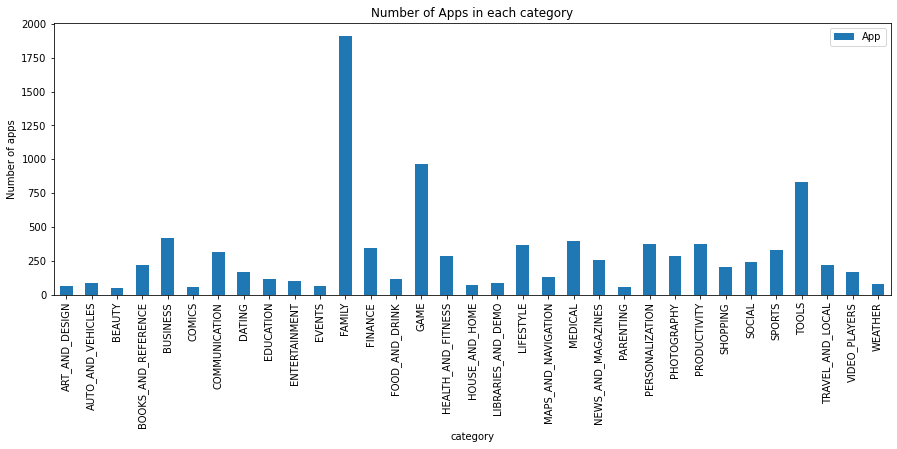

In [48]:
# Creating a variable which contains the number of apps present in each category.
apps_num_in_category=app_df.groupby(['Category'])['App'].count()

# Creating dataframe of this variable
apps_num_in_category_df=pd.DataFrame(apps_num_in_category)

# Creating the plot object
apps_num_in_category_df.plot(kind='bar',figsize=(15,5))
plt.title('Number of Apps in each category')
plt.xlabel('category')
plt.ylabel('Number of apps')

From the above two pie charts, we observe that the paid Apps have higher percentage of positive sentiments as compared to the free apps. Free apps certainly get by with lower user satisfaction. 

# Objective-3 : Observe the sentiments of the free and the paid type app.

### For this, we will merge the two dataframes, that is, app_df and review_df.

In [49]:
# Merging app_df and review_df
app_review_merge_df=pd.merge(app_df,review_df,on='App',how='inner')
app_review_merge_df.head()   # Checking the first few rows of the dataframe

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Reviews,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,2490,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,2490,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,2490,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,2490,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,2490,Best way,Positive,1.00,0.300000


we have now merged the two dataframes app_df and review_df. Now we will see the percentage of each 'Sentiment' of the type 'Free' and 'Paid' separately.

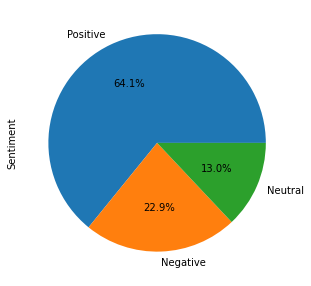

In [50]:
# Let us create two disjoint dataset of the type 'Free' and 'Paid'
type_free_df=app_review_merge_df[app_review_merge_df['Type']=='Free']
type_paid_df=app_review_merge_df[app_review_merge_df['Type']=='Paid']

# We will create a variable which contain unique 'Sentiment' and their count for the type 'Free'
Each_Sentiment_type_free=type_free_df['Sentiment'].value_counts()

# Creating the plot object
Each_Sentiment_type_free.plot(kind='pie',autopct='%1.1f%%', subplots=True, figsize=(5, 5))
plt.show()

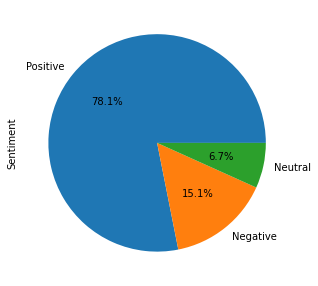

In [51]:
# We will create a variable which contain unique 'Sentiment' and their count for the type 'Paid'
Each_Sentiment_type_paid=type_paid_df['Sentiment'].value_counts()

# Creating the plot object
Each_Sentiment_type_paid.plot(kind='pie',autopct='%1.1f%%', subplots=True, figsize=(5, 5))
plt.show()

From the above two pie charts, we observe that the paid Apps have higher percentage of positive sentiments as compared to the free apps. Free apps certainly get by with lower user satisfaction. 

# Objective-4 : Observing the installs of each category.

Text(0, 0.5, 'Number of installs')

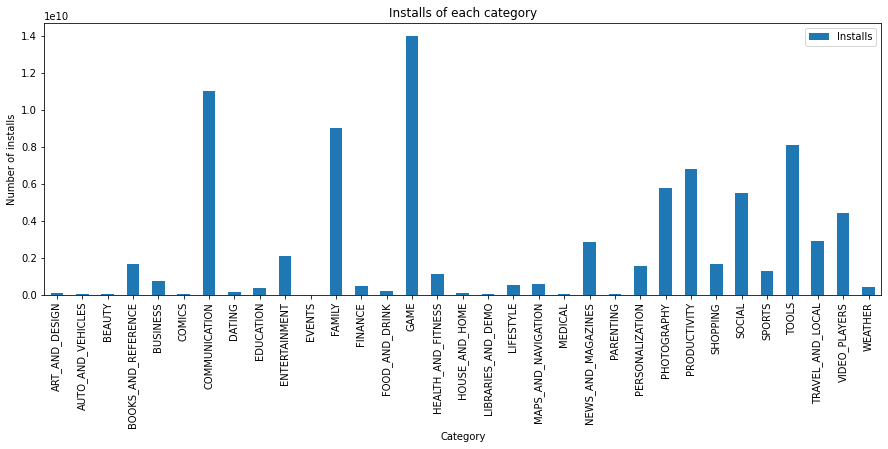

In [52]:
# Creating a variable which store the number of installs of each category.
num_of_installs_in_category=app_df.groupby(['Category'])['Installs'].sum()

# Creating the dateframe of this variable
num_of_installs_in_category_df=pd.DataFrame(num_of_installs_in_category)

# Creating the plot object
num_of_installs_in_category_df.plot(kind='bar',figsize=(15,5))
plt.title('Installs of each category')
plt.xlabel('Category')
plt.ylabel('Number of installs')

From the above plot, we can observe that the category 'GAME' has the highest number of installs. Also the category 'Communication' is in the second place in terms of installs. The categories 'BEAUTY'and 'EVENTS' are the least installed. Thus if we want to make an app the categories 'GAME' and 'COMMUNICATION' should be the first choices of our app category. The category 'game' also has the most number of apps in the play store so building a gaming app that can give competition to already built gaming apps will be a tough job. The 'communication' category has less number of apps and it will be less difficult for us to build a good app in the 'communication' category. Let's get more insights for apps in the 'GAME' and 'COMMUNICATION' Category.

# Objective-5 : Draw comparison among the top Apps in the communication and game category.

In [53]:
# Let's create two dataframes. One is game category app and the other is communication category app. 
game_app_df=app_df[app_df['Category']=='GAME']
communication_app_df=app_df[app_df['Category']=='COMMUNICATION']

In [54]:
# Let's see the number of installs in descending manner.
game_app_df.sort_values(by=['Installs'],ascending=False).head(10)

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Reviews
8179,Subway Surfers,GAME,4.5,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,27721321
7205,Pou,GAME,4.3,24000.0,500000000,Free,0.0,Everyone,Casual,2018-05-25,10485553
2383,Candy Crush Saga,GAME,4.4,74000.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,22428759
8406,Temple Run 2,GAME,4.3,62000.0,500000000,Free,0.0,Everyone,Action,2018-07-05,8118398
6510,My Talking Tom,GAME,4.5,13000.0,500000000,Free,0.0,Everyone,Casual,2018-07-19,14891846
735,Angry Birds 2,GAME,4.6,57000.0,100000000,Free,0.0,Everyone,Casual,2018-07-26,3883589
744,Angry Birds Rio,GAME,4.4,46000.0,100000000,Free,0.0,Everyone,Arcade,2018-07-03,2610539
6294,Minion Rush: Despicable Me Official Game,GAME,4.5,13000.0,100000000,Free,0.0,Everyone 10+,Casual;Action & Adventure,2018-07-12,10216538
6320,Mobile Legends: Bang Bang,GAME,4.4,99000.0,100000000,Free,0.0,Teen,Action,2018-07-24,8219586
737,Angry Birds Classic,GAME,4.4,97000.0,100000000,Free,0.0,Everyone,Arcade,2018-05-24,5566625


In [55]:
# The unique genres and the count of each genres
game_app_df.groupby(['Genres'])['App'].count()

Genres
Action                           299
Action;Action & Adventure          3
Adventure                         73
Adventure;Action & Adventure       1
Arcade                           185
Board                             42
Card                              48
Casino                            39
Casual                            23
Casual;Action & Adventure          1
Casual;Brain Games                 1
Casual;Creativity                  1
Casual;Pretend Play                1
Music                             19
Puzzle                            24
Racing                            91
Role Playing                      15
Simulation                        10
Simulation;Action & Adventure      1
Simulation;Education               1
Sports                             6
Strategy                          17
Trivia                            38
Word                              24
Name: App, dtype: int64

Action is the top genre in gaming apps followed by Arcade.

In [56]:
# Let's concatenate the two genres 'Action' and 'Arcade' of the category 'GAME'
arcade_action=pd.concat([game_app_df.loc[game_app_df['Genres']=='Action'],game_app_df.loc[game_app_df['Genres']=='Arcade']])

[Text(0.5, 1.0, 'Distribution of Size of Action and Arcade gaming apps')]

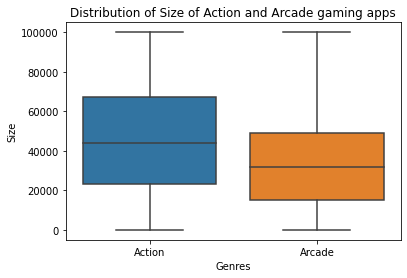

In [57]:
# Ploting to get the idea of the distribution of size of Action and Arcade gaming apps
sns.boxplot(x='Genres',y='Size',data=arcade_action).set(title='Distribution of Size of Action and Arcade gaming apps')

Majority of the apps in the Action genre has size in between 20 Megabytes to 65 Megabytes. Majority of the apps in the Arcade genre has size between 15 Megabytes to 48 Megabytes.

In [58]:
# Let's see the number of installs of communication category in descending manner.
communication_app_df.sort_values(by=['Installs'],ascending=False).head(10)

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Reviews
5176,Hangouts,COMMUNICATION,4.0,13000.0,1000000000,Free,0.0,Everyone,Communication,2018-07-21,3419414
6236,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,13000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,56644712
4921,Gmail,COMMUNICATION,4.3,13000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-02,4604403
4973,Google Chrome: Fast & Secure,COMMUNICATION,4.3,13000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,9642716
9156,WhatsApp Messenger,COMMUNICATION,4.4,13000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,69114494
7941,Skype - free IM & video calls,COMMUNICATION,4.1,13000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,10484169
4978,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,13000.0,500000000,Free,0.0,Everyone,Communication,2018-07-31,2083237
5736,LINE: Free Calls & Messages,COMMUNICATION,4.2,13000.0,500000000,Free,0.0,Everyone,Communication,2018-07-26,10790190
8927,Viber Messenger,COMMUNICATION,4.3,13000.0,500000000,Free,0.0,Everyone,Communication,2018-07-18,11335127
9626,imo free video calls and chat,COMMUNICATION,4.3,11000.0,500000000,Free,0.0,Everyone,Communication,2018-06-08,4785940


### Viewing the free and paid apps of game and communication category.

In [59]:
# Free and paid apps of game category
game_app_df.groupby(['Type']).count()['App']

Type
Free    881
Paid     82
Name: App, dtype: int64

In [60]:
# Free and paid apps of communication category
communication_app_df.groupby(['Type']).count()['App']

Type
Free    289
Paid     27
Name: App, dtype: int64

All the top apps in both game and communication category are free apps. Most of the top apps in communication category are video calling apps, and then chatting apps.

#Summary

Now let's summarise what we have analysed and explored in the given data sets. While going through the data sets we found that there were null values. Also duplicate rows were also present. We cleaned both the data sets. By analysing and exploring the two data sets given to us, we came to know that the most apps used by the people are of category communication and game. The game apps have the highest number of installs and communication have the second highest number of installs. So if we want to make an app, the game and the communication category should be the first choices of our app category. But since building a gaming app that can give competition to already built gaming apps will be a tough job, so it will be less difficult for us to build a good app in the communication category. Also we saw from our exploration that mostly these apps are of free type. Most of the top apps in communication category are video calling apps, and then chatting apps.

#Conclusion

By doing this exploratory data analysis on Play store Apps and User Review,we conclude that we should make an app of communication category and it should also be free. We can make an app which provide free calls and messages. It should be able to provide high quality video calls. We will try to make such an app that will also provide the transfer of big files and large number of documents.